In [1]:
## Imports
import re
import json
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from skimage import io
from wordcloud import WordCloud

## Set options
random.seed(42)

In [2]:
## Read data
eras_tour_data = pd.read_csv("/kaggle/input/taylor-swift-era-tour-dataset/lyrics_data.csv")
print(eras_tour_data.shape)
eras_tour_data.head()

(2431, 4)


,SongName,Era,Lyrics,LineNum
0,Miss Americana & The Heartbreak Prince,Lover Act,"You know I adore you, I'm crazier for you",0
1,Miss Americana & The Heartbreak Prince,Lover Act,"Than I was at 16, lost in a film scene",1
2,Miss Americana & The Heartbreak Prince,Lover Act,"Waving homecoming queens, marching band playing",2
3,Miss Americana & The Heartbreak Prince,Lover Act,I'm lost in the lights,3
4,Miss Americana & The Heartbreak Prince,Lover Act,American glory faded before me,4


### Retrieve Spotify data for her albums & songs

In [3]:
!pip install spotipy --quiet

### What does Spotify have for TS?

In [4]:
## Open albums
albums = pd.read_csv("/kaggle/input/taylor-swift-spotify-dataset/taylor_swift_spotify.csv")
print("Albums", albums.shape)

Albums (530, 18)


In [5]:
tracks = pd.read_csv("/kaggle/input/taylor-swift-spotify-dataset/taylor_swift_spotify.csv")
print("Tracks", tracks.shape)

Tracks (530, 18)


In [6]:
spotify_tracks = pd.read_csv("/kaggle/input/-spotify-tracks-dataset/dataset.csv")
print("Sptofy tracks", spotify_tracks.shape)

Sptofy tracks (114000, 21)


### How many albums does she have?

In [7]:
print("Total albums:", albums.shape[0])

Total albums: 530


### How was the trend of the releases?

In [8]:
tracks["release_date"] = pd.to_datetime(tracks["release_date"])
tracks["year"] = tracks["release_date"].dt.year
fig=px.area(tracks.groupby('year',as_index=False).count().sort_values(by='name',ascending=False).sort_values(by='year'),x='year',y='name',markers=True,labels={'name':'Total songs'},color_discrete_sequence=['green'],title='<b>Year by Year Songs collection')
fig.update_layout(hovermode='x',title_x=0.5)

# Word Cloud ^^

### Tracks

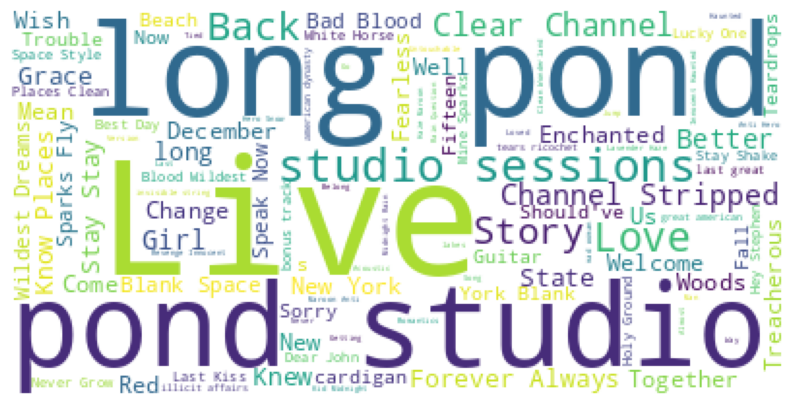

In [9]:
track_names = re.sub(r'\([^)]*\)', '', " ".join(tracks.name))
wc = WordCloud(background_color="white", collocations=True).generate(track_names)
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis("off");

### Trend of poluarity of TS vs all other artists on spotify

In [10]:
px.box(tracks, x="popularity", width=800, height=400)
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Box(x=tracks.popularity),
    row=1, col=1
)

fig.add_trace(
    go.Box(x=spotify_tracks.popularity),
    row=1, col=2
)

fig.update_layout(height=400, width=1000, title_text="TS Popularity vs Average Popularity on Spotify")
fig.show()


In [11]:
fig=px.line(tracks.sort_values(by='popularity',ascending=False).head(25),x='name',y='popularity',hover_data=['album'],color_discrete_sequence=['green'],markers=True,title='<b> Popularity of songs')
fig.show()

### How does the spotify metrics look like

In [12]:
fig=make_subplots(rows=3,cols=3,subplot_titles=('<i>popularity', '<i>danceability', '<i>energy', '<i>loudness', '<i>log(speechiness)', '<i>acousticness', '<i>log(liveness)', '<i>valence', '<i>tempo'))
fig.add_trace(go.Histogram(x=tracks['popularity'],name='popularity'),row=1,col=1)
fig.add_trace(go.Histogram(x=tracks['danceability'],name='danceability'),row=1,col=2)
fig.add_trace(go.Histogram(x=tracks['energy'],name='energy'),row=1,col=3)
fig.add_trace(go.Histogram(x=tracks['loudness'],name='loudness'),row=2,col=1)
fig.add_trace(go.Histogram(x=np.log(tracks['speechiness']),name='log(speechiness)'),row=2,col=2)
fig.add_trace(go.Histogram(x=tracks['acousticness'],name='acousticness'),row=2,col=3)
fig.add_trace(go.Histogram(x=np.log(tracks['liveness']),name='log(liveness)'),row=3,col=1)
fig.add_trace(go.Histogram(x=tracks['valence'],name='valence'),row=3,col=2)
fig.add_trace(go.Histogram(x=tracks['tempo'],name='tempo'),row=3,col=3)
fig.update_layout(height=900,width=900,title_text='<b>Spotify Metrics')

### Observations:

- TS has a total of `25 albums` with a following of `89M`.
- TS is a `pop` artist, she released record number of tracks(155) in the year 2020, and her lowest number of releases has been 15 tracks.
- TS releases on an average `15-22 tracks`, with upper limit being 30 but one of the albums has 46 tracks.
- In total, she has created `487` tracks, her average popularity score is `66` with the highest score being `98` which is `above average` when compared to overall popularity of songs on Spotify.
- Overall high energy, daancebility, popularity, tempo and valence.